# Decision Tree. 


In this part, we use a classification algorithm to build a model from the historical data of prices. We then use the trained decision tree to predict the price of a future house sale.

First, we import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Importing the dataset

df = pd.read_csv("../nyc-rolling-sales.csv", delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

## Data processing & Exploration

In [4]:
#Removing unnecessary columns 
del df['EASE-MENT']
del df['Unnamed: 0']
del df['ADDRESS']
del df['APARTMENT NUMBER']

In [5]:
#Checking for duplicates
sum(df.duplicated(df.columns))

956

In [6]:
#Removing duplicate records
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [7]:
#Convert some of the columns to desired datatype
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')

In [8]:
# Convert Sale Date to Year
from datetime import datetime

for i in range(len(df)):    
    if True:
        the_date = datetime.strptime(str(df['SALE DATE'][i]), '%Y-%m-%d %H:%M:%S')
        df.at[i,'SALE DATE'] = the_date.year
    else:
        df.at[i,'SALE DATE'] = int(df.at[i,'SALE DATE'])
    
# convert to integer
df['SALE DATE'] = df['SALE DATE'].astype(int)

df['SALE DATE'].head()

KeyError: 48

In [10]:
#checking missing values
df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [11]:
miss=df.isnull().sum()/len(df)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

SALE PRICE           0.168365
LAND SQUARE FEET     0.310484
GROSS SQUARE FEET    0.326371
dtype: float64

In [12]:
#Convert series to column DataFrame
miss=miss.to_frame()
#Set Column Name
miss.columns=['count']
#Set Index Name
miss.index.names=['Name']
#Create Column from Index
miss['Name']=miss.index
miss

,count,Name
Name,,
SALE PRICE,0.168365,SALE PRICE
LAND SQUARE FEET,0.310484,LAND SQUARE FEET
GROSS SQUARE FEET,0.326371,GROSS SQUARE FEET


In [13]:
#Plot the missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Name', y='count',data=miss)
plt.xticks(rotation=90)
sns

<module 'seaborn' from '//anaconda3/lib/python3.7/site-packages/seaborn/__init__.py'>

In [14]:
#Populating mean values for missing data
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

In [16]:
# Removing null observations
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

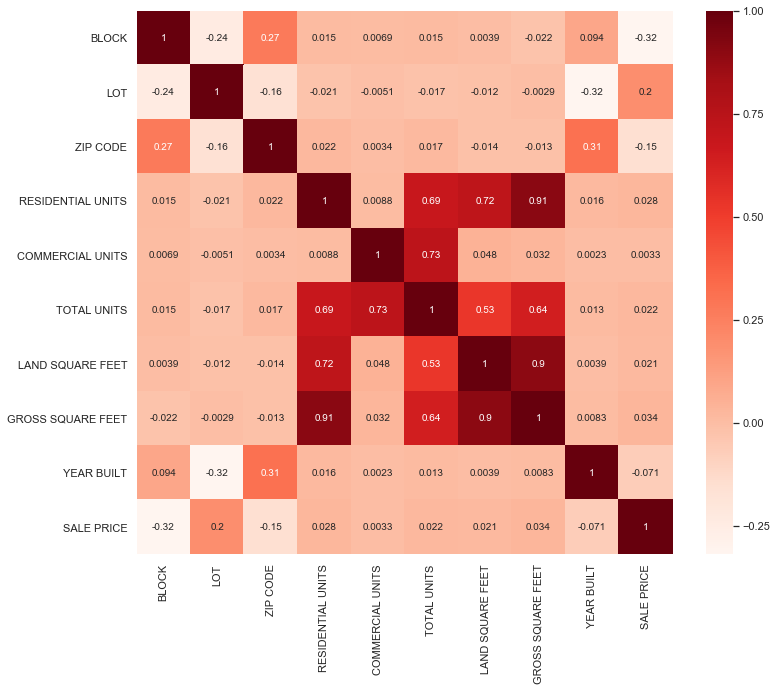

In [19]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
# Most Correlations
cor_target = abs(cor["SALE PRICE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

BLOCK         0.319305
LOT           0.195200
ZIP CODE      0.151620
SALE PRICE    1.000000
Name: SALE PRICE, dtype: float64

In [22]:
del df['SALE DATE']

#### Encoding


In [24]:
X = df[['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','BLOCK','LOT','BUILDING CLASS AT PRESENT','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE']].values
X[:, 14]

array([2, 2, 2, ..., 1, 1, 1], dtype=object)

In [25]:
# Getting the dependent variables and independent variables
X = df[['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','BLOCK','LOT','BUILDING CLASS AT PRESENT','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE']].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])

labelencoder_X_6 = LabelEncoder()
X[:, 6] = labelencoder_X_6.fit_transform(X[:, 6])


labelencoder_X_16 = LabelEncoder()
X[:, 15] = labelencoder_X_16.fit_transform(X[:, 15])

In [26]:
X[0:5]

array([[1, 1, 6, 7, 402, 21, 18, 10009, 10, 0, 10, 2272.0, 6794.0, 1913,
        2, 17],
       [1, 1, 6, 7, 406, 32, 18, 10009, 8, 0, 8, 1750.0, 4226.0, 1920, 2,
        17],
       [1, 1, 8, 5, 373, 40, 20, 10009, 0, 0, 0, 3846.981435858288,
        3874.3228378618364, 1920, 2, 19],
       [1, 1, 8, 5, 373, 40, 20, 10009, 0, 0, 0, 3846.981435858288,
        3874.3228378618364, 1920, 2, 19],
       [1, 1, 8, 5, 373, 40, 20, 10009, 0, 0, 0, 3846.981435858288,
        3874.3228378618364, 1920, 2, 19]], dtype=object)

We then set the target variable, Sale Price


In [28]:
# Target variable, Sale Price

y = df['SALE PRICE'].values
y[0:5]

array([3936272., 3192840.,  499000.,  529500.,  423000.])

## Setting up the decision tree

In [29]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_train, X_test, y_train, y_test <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=34. <br> We will also try random state = 0 <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [31]:
# Splitting the training set and test set
X_train ,X_test, y_train , y_test = train_test_split(X , y, test_size = 0.3 , random_state =34)

In [32]:
# Training set
X_train.shape , y_train.shape

((38173, 16), (38173,))

In [33]:

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# Checking shape of X_train and y_train. Thier shapes should match
print(X_train.shape)
print(y_train.shape)

(38173, 16)
(38173,)


In [35]:
# Also checking the shape of X_test and y_test. Thier shapes should also match
print(X_test.shape)
print(y_test.shape)

(16361, 16)
(16361,)


## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>priceTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [36]:
priceTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
priceTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [37]:
priceTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [38]:
predTree = priceTree.predict(X_test)

We print out <b>predTree</b> and <b>y_test</b> to visually compare the prediction to the actual values.

In [39]:
print (predTree [0:5])
print (y_test [0:5])

[420000. 400000. 763687. 470000. 150000.]
[1270000. 2500000.  491790.  332000.  140000.]


## Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.015035755760650327


In [73]:
# RMSE
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [75]:
rmse(y_test,predTree)

692152.7732118465

These are very poor scores. We will do some visulization, check feature importance and re-build the model

## Feature Importance


With the very low accuracy, we would like to review the data and remove any noise that may be affecting performance

In [41]:
from sklearn.ensemble import ExtraTreesClassifier


In [42]:
print('Feature importances: {}'.format(priceTree.feature_importances_))
type(priceTree.feature_importances_)

Feature importances: [0.03679404 0.04857123 0.11549536 0.00308566 0.24043385 0.11155583
 0.01218395 0.12234182 0.00657886 0.         0.02139389 0.06378611
 0.07683286 0.12721396 0.         0.01373256]


numpy.ndarray

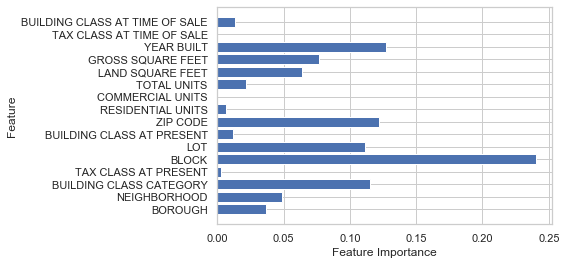

In [43]:
#Feature Importance
n_feature = X_train.shape[1]
featureNames = df.drop(columns='SALE PRICE')
featureNames = featureNames.columns.values 
plt.barh(range(n_feature), priceTree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), featureNames)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Model Re-building

We will now re-train the data using selected features
* Features with importance of less than .05 will be dropped
* We can also see that the dropped features do not correlate well with SALE PRICE
* Finally, we want to check that the top important features do not correlate much with each other

In [44]:
# Most Correlations
cor_target2 = abs(cor["SALE PRICE"])
#Selecting highly correlated features
relevant_features2 = cor_target2[cor_target2>0.1]
relevant_features2


BLOCK         0.319305
LOT           0.195200
ZIP CODE      0.151620
SALE PRICE    1.000000
Name: SALE PRICE, dtype: float64

In [45]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.000000,6794.000000,1913,2,C4,3936272.0
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.000000,4226.000000,1920,2,C4,3192840.0
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009,0,0,0,3846.981436,3874.322838,1920,2,C6,499000.0
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009,0,0,0,3846.981436,3874.322838,1920,2,C6,529500.0
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009,0,0,0,3846.981436,3874.322838,1920,2,C6,423000.0


In [46]:
df_2 = []
df_2 = df
df_2.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.000000,6794.000000,1913,2,C4,3936272.0
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.000000,4226.000000,1920,2,C4,3192840.0
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009,0,0,0,3846.981436,3874.322838,1920,2,C6,499000.0
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009,0,0,0,3846.981436,3874.322838,1920,2,C6,529500.0
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009,0,0,0,3846.981436,3874.322838,1920,2,C6,423000.0


In [47]:
# remove the less important features

del df_2['BUILDING CLASS AT TIME OF SALE']
del df_2['TAX CLASS AT TIME OF SALE']
del df_2['TOTAL UNITS']
del df_2['COMMERCIAL UNITS']
del df_2['RESIDENTIAL UNITS']
del df_2['BUILDING CLASS AT PRESENT']
del df_2['TAX CLASS AT PRESENT']
del df_2['NEIGHBORHOOD']
del df_2['BOROUGH']
# del df_2['SALE PRICE']  # do not delete sale data yet so we can run correlation 


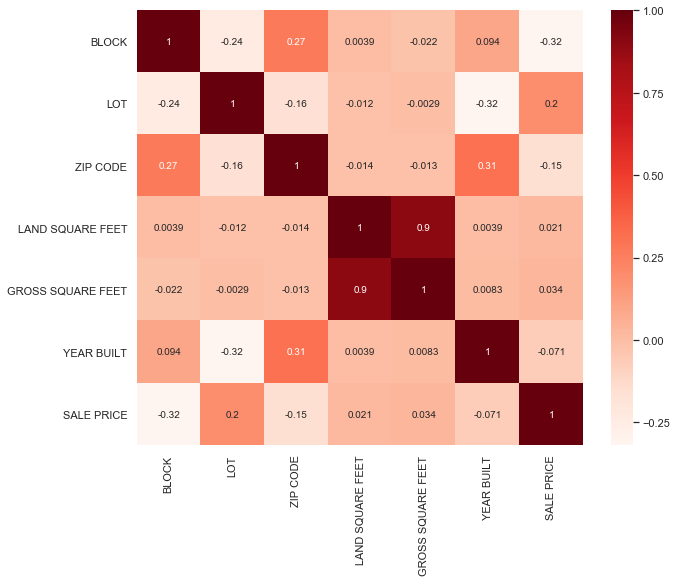

In [49]:
#Using Pearson Correlation to check feature correlations
plt.figure(figsize=(10,8))
cor2 = df_2.corr()
sns.heatmap(cor2, annot=True, cmap=plt.cm.Reds)
plt.show()

In [50]:
# GROSS SQUARE FEET  and LAND SQUARE FEET are highly correlated with each other, 
# We drop LAND SQUARE FEET becuase it is slightly less correlated with SALE PRICE at .021

del df_2['LAND SQUARE FEET']


We now begin rebuilding the model

In [51]:
df_2.head()

,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
3,07 RENTALS - WALKUP APARTMENTS,402,21,10009,6794.000000,1913,3936272.0
6,07 RENTALS - WALKUP APARTMENTS,406,32,10009,4226.000000,1920,3192840.0
13,09 COOPS - WALKUP APARTMENTS,373,40,10009,3874.322838,1920,499000.0
15,09 COOPS - WALKUP APARTMENTS,373,40,10009,3874.322838,1920,529500.0
16,09 COOPS - WALKUP APARTMENTS,373,40,10009,3874.322838,1920,423000.0


In [52]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54534 entries, 3 to 84545
Data columns (total 7 columns):
BUILDING CLASS CATEGORY    54534 non-null object
BLOCK                      54534 non-null int64
LOT                        54534 non-null int64
ZIP CODE                   54534 non-null int64
GROSS SQUARE FEET          54534 non-null float64
YEAR BUILT                 54534 non-null int64
SALE PRICE                 54534 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 3.3+ MB


In [53]:
# Get the variables
A = df_2[['BUILDING CLASS CATEGORY','BLOCK','LOT','ZIP CODE','GROSS SQUARE FEET','YEAR BUILT']].values
b = df_2['SALE PRICE'].values


# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_A_1 = LabelEncoder()
A[:, 0] = labelencoder_A_1.fit_transform(A[:, 0])


# Target variable, Sale Price

A[0:5]
b[0:5]

array([3936272., 3192840.,  499000.,  529500.,  423000.])

In [54]:
# Split  training set and test set
A_train ,A_test, b_train , b_test = train_test_split(A , b, test_size = 0.3 , random_state =34)

In [55]:
# Training set
A_train.shape , b_train.shape

((38173, 6), (38173,))

In [56]:
# Feature Scaling
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [57]:
print(A_train.shape)
print(b_train.shape)

print(A_test.shape)
print(b_test.shape)

(38173, 6)
(38173,)
(16361, 6)
(16361,)


In [58]:
# 1 specify second model
priceTree_2 = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
priceTree_2 # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
# 2  fit the data
priceTree_2.fit(A_train, b_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
# 3 Prediction
predTree_2 = priceTree_2.predict(A_test)

In [61]:
# 4 Print prediction
print (predTree_2 [0:5])
print (b_test [0:5])

[1185000.  400000. 1050000.  470000.  250000.]
[1270000. 2500000.  491790.  332000.  140000.]


In [62]:
# 5 Accuracy of predTree_2
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(b_test, predTree_2))

DecisionTrees's Accuracy:  0.0149746348022737


After feature selction, the Accuracy is relatively the same!<br>
<br>
We will build one more model using a higher max_depth

In [63]:
# Model using max_depth = 20

priceTree_3 = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
priceTree_3.fit(A_train, b_train)
predTree_3 = priceTree_3.predict(A_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(b_test, predTree_3))


DecisionTrees's Accuracy:  0.01772507792922193


F1 score, Jaccard Similarity, and RMSE

In [64]:
from sklearn.metrics import f1_score
f1_score(b_test, predTree_3, average='weighted') 

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.016880589784208252

In [68]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(b_test, predTree_3)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.01772507792922193

In [76]:
rmse(b_test,predTree_3)

620436.6733025813

## Conclusion

<p>With a higher max_depth, and with feature selction, the Accuracy is still very low.
It appears that Decisoin Trees is not a great option for our problem</p>

<p>
The Accuracy may be imporved by grouping the price ranges into bins as this<br> 
is what Decision trees would be great for<br>
</p>
